<a href="https://colab.research.google.com/github/brianm135/ai_driver_assistant_cv/blob/main/object_detection_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FYP: AI Driver Assistant using Computer Vision



# Setup
*   Download Dataset
*   Install Modules


In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.9/606.9 kB 12.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# from datasets import load_dataset

# dataset = load_dataset("Francesco/road-signs-6ih4y")

In [ ]:
# def convert_coco2yolo(coco: dict):
#   x_min, y_min = coco[0], coco[1]
#   width, height = coco[2], coco[3]

#   x_center = x_min + (width/2)
#   y_center = y_min + (height/2)
#   return [x_center, y_center, width, height]

In [ ]:
# train_images = dataset['train']['image']
# test_images = dataset["test"]["image"]
# objects = dataset["train"]["objects"]

NameError: ignored

In [ ]:
# categories = dataset["train"].features["objects"].feature["category"].names

In [ ]:
# i=14
# image = train_images[i]
# obj = objects[i]
# bbox = obj["bbox"][0]
# label = categories[obj["category"][0]]

# fig, ax = plt.subplots()

# x_min, y_min = bbox[0], bbox[1]
# width, height = bbox[2], bbox[3]

# x_center, y_center, width, height = convert_coco2yolo(bbox)

# rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none')
# ax.add_patch(rect)

# plt.scatter(bbox[0], bbox[1])
# plt.scatter((bbox[0] + bbox[2]),(bbox[1] + bbox[3]))
# plt.scatter(x_center, y_center)


# plt.imshow(image)
# plt.axis('on')
# plt.show()

# Loading & Preprocessing Data

In [ ]:
dir_path = "./drive/MyDrive/Datasets/Road Sign Object detection YOLO data"
config_path = "./config.yaml"

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

# Testing YOLO v8


In [ ]:
# Load a pretrained YOLO model
model = YOLO("yolov8n.pt")

100%|██████████| 6.23M/6.23M [00:01<00:00, 6.18MB/s]


In [ ]:
model.train(data="./config.yaml", task="detect", mode="train", epochs=100, project="./drive/MyDrive")

Ultralytics YOLOv8.0.148 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/runs/detect/train/weights/best.pt, data=./config.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./drive/MyDrive, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load trained model and test

In [ ]:
model = YOLO("/content/drive/MyDrive/train/weights/best.pt")

In [ ]:
results = model.predict("/content/drive/MyDrive/Datasets/yolov8/images/test/00001.jpg", save=True)


image 1/1 /content/drive/MyDrive/Datasets/yolov8/images/test/00001.jpg: 384x640 2 mandatorys, 1 other, 74.8ms
Speed: 13.0ms preprocess, 74.8ms inference, 40.0ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


In [ ]:
results[0].boxes.data.cpu().numpy()

array([], shape=(0, 6), dtype=float32)

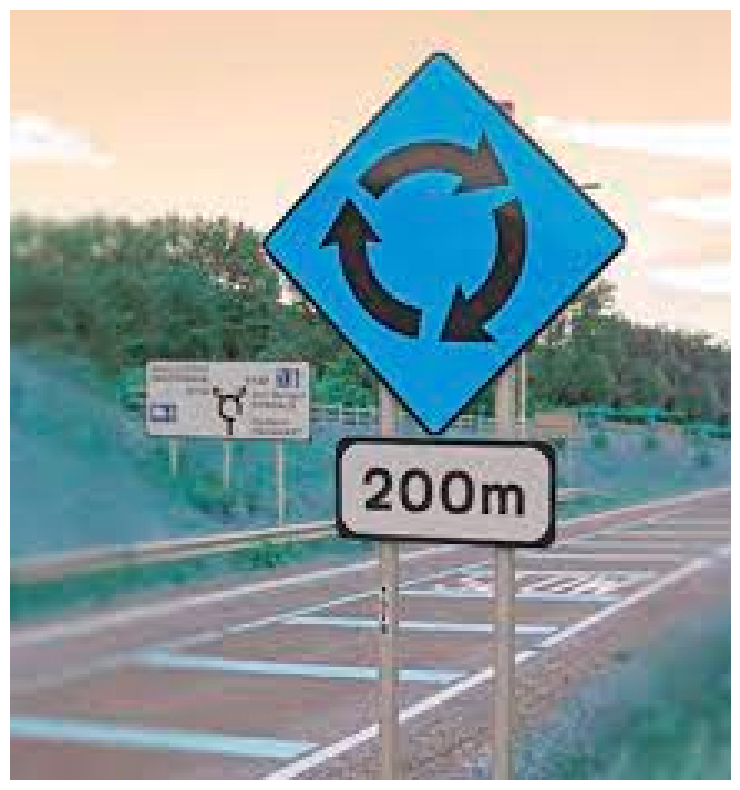

In [ ]:
image = results[0].orig_img

boxes = results[0].boxes.data.cpu().numpy()

plt.figure(figsize=(10, 10))  # Adjust the size as desired
plt.imshow(image)

# Plot the bounding boxes
for box in boxes:
    x1, y1, x2, y2, score, label = box

    label = results[0].names[label]

    # Create a rectangle patch
    rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, fill=False, color='r', linewidth=2)

    # Add the rectangle patch to the plot
    plt.gca().add_patch(rect)
    plt.text(x1, y1 - 10, f'{label}: {score:.2f}', color='r')

plt.axis('off')
plt.show()

In [ ]:
print(results[0])

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'c